<a href="https://colab.research.google.com/github/danielmrios/Methodologies-of-Data-Science/blob/main/climate_change_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Purpose of the notebook

We have over 80 years of daily sea surface temperature, wave height, and wind speed data from seven major ocean basins: the Arctic, North Atlantic, South Atlantic, Indian, North Pacific, South Pacific, and Southern Oceans.


I will analyze the Pacific basins with an emphasis on sea surface tempurature to identify and predict ENSO events.

## The Question

El Nino can be charactarized as a warming of the ocean, while La Nina is the cooling of the pacific ocean. They each occur every 2-7 years and span about 9-12 months. Let's see if we can identify these trends using tempurature data and predict when they will next occur.

## The data

These datasets are from the north and south pacific

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.signal import welch

In [7]:
# Read the CSV data from the URL into a pandas DataFrame
df_north = pd.read_csv('https://raw.githubusercontent.com/danielmrios/Methodologies-of-Data-Science/main/Climate-Change/north_pacific.csv')
df_south = pd.read_csv('https://raw.githubusercontent.com/danielmrios/Methodologies-of-Data-Science/main/Climate-Change/south_pacific.csv')

In [8]:
df_north.head()

,sst,u10,hsig,time,latitude,longitude
0,286.97070,0.612978,4.136298,1940-01-01 12:00:00,34.9,-165.0
1,286.97836,2.574189,2.759662,1940-01-02 12:00:00,34.9,-165.0
2,287.01630,2.623150,1.873087,1940-01-03 12:00:00,34.9,-165.0
3,287.02680,-1.868878,1.753748,1940-01-04 12:00:00,34.9,-165.0
4,287.03183,3.412738,2.692871,1940-01-05 12:00:00,34.9,-165.0


In [9]:
df_south.head()

,sst,u10,hsig,time,latitude,longitude
0,291.74900,1.479218,2.039036,1940-01-01 12:00:00,-35.0,-165.0
1,291.80466,0.636111,1.567293,1940-01-02 12:00:00,-35.0,-165.0
2,291.85544,3.894659,1.214057,1940-01-03 12:00:00,-35.0,-165.0
3,291.90817,3.991070,2.437233,1940-01-04 12:00:00,-35.0,-165.0
4,291.95996,2.706026,2.678540,1940-01-05 12:00:00,-35.0,-165.0


In [10]:
df_north.describe()

,sst,u10,hsig,latitude,longitude
count,30741.000000,30741.000000,30741.000000,3.074100e+04,30741.0
mean,291.723484,1.462743,2.627334,3.490000e+01,-165.0
std,3.825816,6.038611,1.311026,7.105543e-15,0.0
min,284.794000,-18.708815,0.746870,3.490000e+01,-165.0
25%,288.351680,-3.112220,1.625169,3.490000e+01,-165.0
50%,290.842040,1.232235,2.302131,3.490000e+01,-165.0
75%,295.407650,5.660821,3.292069,3.490000e+01,-165.0
max,300.266850,24.724703,12.141653,3.490000e+01,-165.0


In [11]:
df_south.describe()

,sst,u10,hsig,latitude,longitude
count,30741.000000,30741.000000,30741.000000,30741.0,30741.0
mean,290.573772,0.771190,2.729200,-35.0,-165.0
std,2.337555,6.082505,0.931080,0.0,0.0
min,285.857940,-18.759240,0.940539,-35.0,-165.0
25%,288.417330,-3.833070,2.065207,-35.0,-165.0
50%,290.473970,0.715698,2.536413,-35.0,-165.0
75%,292.647000,5.290995,3.195914,-35.0,-165.0
max,298.204830,20.636452,8.566135,-35.0,-165.0


Look at data types

In [12]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30741 entries, 0 to 30740
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sst        30741 non-null  float64
 1   u10        30741 non-null  float64
 2   hsig       30741 non-null  float64
 3   time       30741 non-null  object 
 4   latitude   30741 non-null  float64
 5   longitude  30741 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [13]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30741 entries, 0 to 30740
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sst        30741 non-null  float64
 1   u10        30741 non-null  float64
 2   hsig       30741 non-null  float64
 3   time       30741 non-null  object 
 4   latitude   30741 non-null  float64
 5   longitude  30741 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


Let's convert time to pandas datetime

In [14]:
df_north["time"] = pd.to_datetime(df_north["time"])
df_south["time"] = pd.to_datetime(df_south["time"])

In [15]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30741 entries, 0 to 30740
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   sst        30741 non-null  float64       
 1   u10        30741 non-null  float64       
 2   hsig       30741 non-null  float64       
 3   time       30741 non-null  datetime64[ns]
 4   latitude   30741 non-null  float64       
 5   longitude  30741 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.4 MB


In [16]:
df_north.shape

(30741, 6)

In [17]:
df_south.shape

(30741, 6)

### Data Preprocessing

Joining by date, then average for each date and filter for temperature

In [18]:
# Join the two DataFrames together based on the 'time' column
df = pd.merge(df_north, df_south, on='time', suffixes=('_north', '_south'))

# Calculate the average of corresponding values from both DataFrames for each row
df['sst'] = (df['sst_north'] + df['sst_south']) / 2
df['u10'] = (df['u10_north'] + df['u10_south']) / 2
df['hsig'] = (df['hsig_north'] + df['hsig_south']) / 2
df['latitude'] = (df['latitude_north'] + df['latitude_south']) / 2
df['longitude'] = (df['longitude_north'] + df['longitude_south']) / 2

# Drop unnecessary columns
df.drop(['sst_north', 'sst_south', 'u10_north', 'u10_south', 'hsig_north', 'hsig_south', 'latitude_north', 'latitude_south', 'longitude_north', 'longitude_south'], axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

                     time         sst       u10      hsig  latitude  longitude
0     1940-01-01 12:00:00  289.359850  1.046098  3.087667     -0.05     -165.0
1     1940-01-02 12:00:00  289.391510  1.605150  2.163478     -0.05     -165.0
2     1940-01-03 12:00:00  289.435870  3.258905  1.543572     -0.05     -165.0
3     1940-01-04 12:00:00  289.467485  1.061096  2.095490     -0.05     -165.0
4     1940-01-05 12:00:00  289.495895  3.059382  2.685706     -0.05     -165.0
...                   ...         ...       ...       ...       ...        ...
30736 2024-02-25 12:00:00  291.299375 -5.352708  3.220965     -0.05     -165.0
30737 2024-02-26 12:00:00  291.624530 -4.231162  2.271335     -0.05     -165.0
30738 2024-02-27 12:00:00  291.680375 -3.304564  2.042895     -0.05     -165.0
30739 2024-02-28 12:00:00  291.820640 -2.807708  1.785305     -0.05     -165.0
30740 2024-02-29 12:00:00  291.829120 -5.641780  2.136484     -0.05     -165.0

[30741 rows x 6 columns]


Great, now we have a dataframe with the Pacific ocean's average of key metrics. This should prove useful in identifying trends relating to ENSO.

## Identifying the trend

Let's see if we can identify the ENSO trends using spectral analysis

Methods

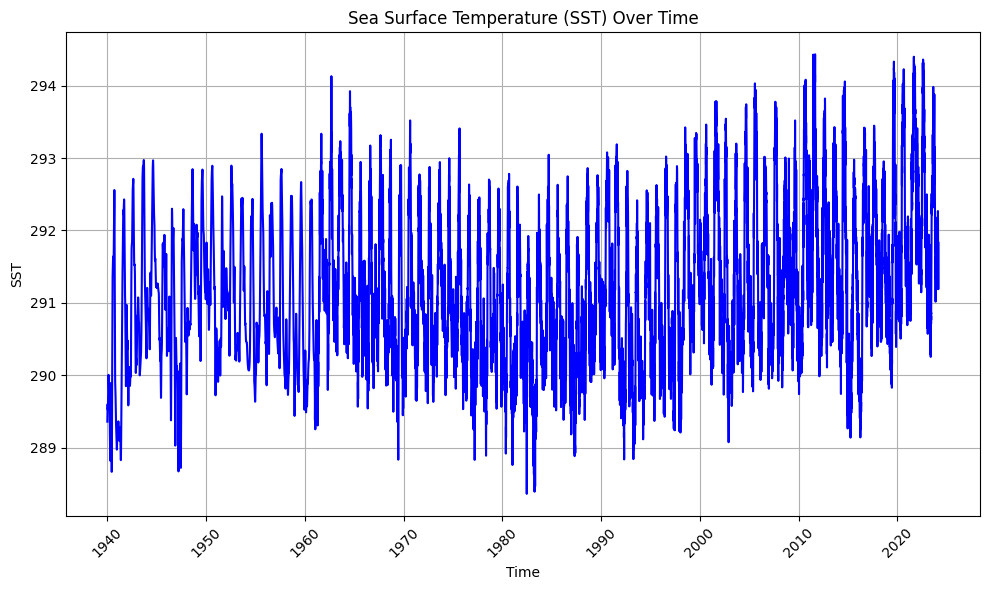

In [19]:
import matplotlib.pyplot as plt

# Plot SST over time
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['sst'], color='blue', linestyle='-')
plt.title('Sea Surface Temperature (SST) Over Time')
plt.xlabel('Time')
plt.ylabel('SST')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

It's hard to identify any specific occurances from this view but we can identify that some fluctuations in tempurature are occuring.

Let's run a low pass filter through the data to show long term trends and filter out daily fluctuations.

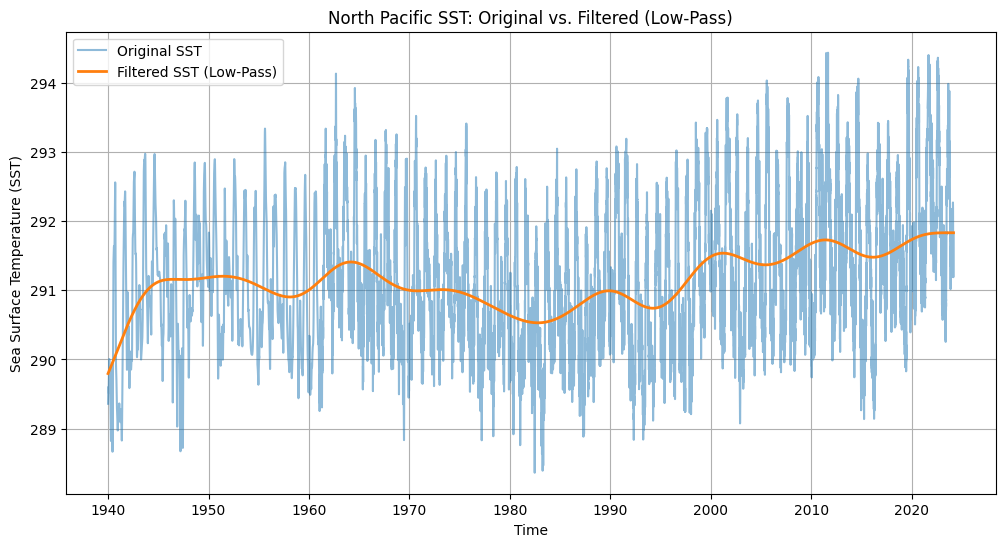

In [20]:
from scipy.signal import butter, filtfilt

fs = 365
cutoff_freq = 1/10
nyquist_freq = 0.5 * fs
normalized_cutoff = cutoff_freq / nyquist_freq
order = 4

# low-pass Butterworth filter
b, a = butter(order, normalized_cutoff, btype='low', analog=False)

# Apply the filter to the SST data
sst_filtered = filtfilt(b, a, df['sst'])

# Plot original and filtered SST data
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['sst'], label='Original SST', alpha=0.5)
plt.plot(df['time'], sst_filtered, label='Filtered SST (Low-Pass)', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature (SST)')
plt.title('North Pacific SST: Original vs. Filtered (Low-Pass)')
plt.legend()
plt.grid(True)
plt.show()

This shows us a lot clearer how el nino and la nina might be occuring. There appears to be high and low points occuring about every 5 years.

Let's see how this looks with power spectral density. This'll help us identify what trends are occuring. I also outlined 2 to 7 years to help us visually see them.

<ipython-input-28-88600e563d95>:8: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


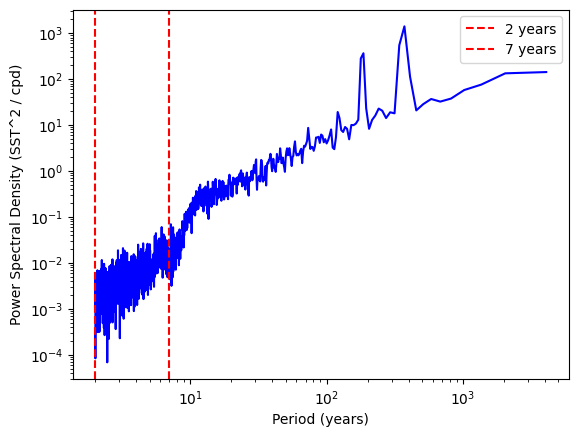

In [28]:
# Calculate SST anomalies
sst_anomalies = df['sst'] - df['sst'].mean()

frequencies, psd = welch(sst_anomalies, fs=1.0, window='hamming', nperseg=4096)

# Convert Frequency to Period (in years)
periods = 1 / frequencies

fig, ax = plt.subplots()
ax.plot(periods, psd, color='blue')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Period (years)")
ax.set_ylabel("Power Spectral Density (SST^2 / cpd)")

# Highlight (2-7 years)
period_range = [2, 7]
plt.axvline(x=period_range[0], color='red', linestyle='--', label='2 years')
plt.axvline(x=period_range[1], color='red', linestyle='--', label='7 years')
plt.legend()
plt.show()

Here we observe a heightened variability in the 2-7 range, likely caused by the ENSO events

## Forecast the Trend

Let's see if we can predict when the next ENSO's will occur by forecasting out 7 years from now

We'll start by doing a standard lag regression and see how well it can be predicted

In [30]:
k = 4
train_indices = list(range(len(df) // 2))
test_indices = list(range(len(df) // 2, len(df)))

sst_train = df['sst'].values[train_indices]
sst_test = df['sst'].values[test_indices]

sst_lagged_train = np.zeros((len(train_indices) - k, k))
sst_lagged_test = np.zeros((len(test_indices) - k, k))

# Construct lagged matrix for training data
for i in range(k):
    sst_lagged_train[:, i] = sst_train[i:len(train_indices) - k + i]

# Construct lagged matrix for testing data
for i in range(k):
    sst_lagged_test[:, i] = sst_test[i:len(test_indices) - k + i]

sst_target_train = sst_train[k:]
sst_target_test = sst_test[k:]

# Fit linear regression model using the first half of the data
reg = LinearRegression().fit(sst_lagged_train, sst_target_train)

# Predict using the lagged matrix constructed from the second half of the data
sst_predicted_test = reg.predict(sst_lagged_test)

# Calculate Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(sst_predicted_test - sst_target_test))

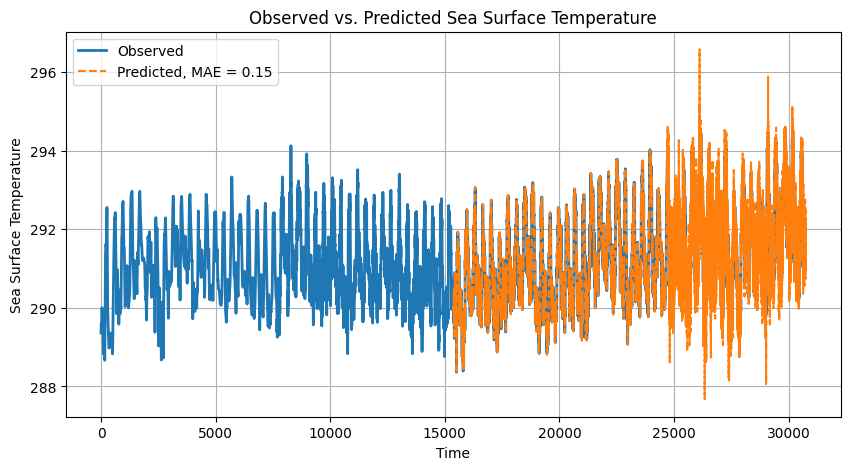

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(df)), df['sst'].values, '-', linewidth=2, label="Observed")
plt.plot(range(len(sst_train) + k, len(df)), sst_predicted_test, '--', label=f"Predicted, MAE = {mae:.2f}")
plt.xlabel("Time")
plt.ylabel("Sea Surface Temperature")
plt.title("Observed vs. Predicted Sea Surface Temperature")
plt.legend()
plt.grid(True)
plt.show()

The predicted values seem to fare well with a mean absolute error of 0.15

Now let's use Prophet to forecast future sea surface tempuratures using its seasonal functionality to outline el nino/la nina

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbguau063/oprcoh2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbguau063/mdu706np.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49568', 'data', 'file=/tmp/tmpbguau063/oprcoh2l.json', 'init=/tmp/tmpbguau063/mdu706np.json', 'output', 'file=/tmp/tmpbguau063/prophet_modelm316wym0/prophet_model-20240522042019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:20:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:20:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


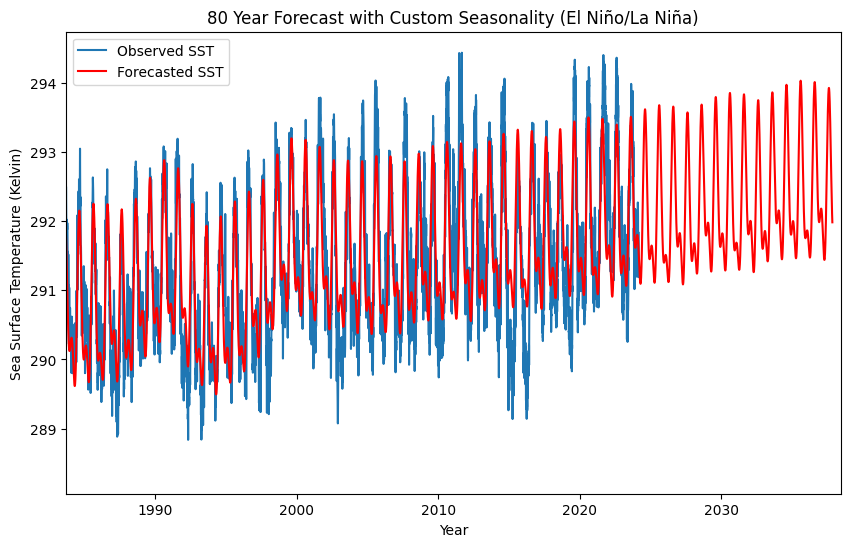

In [32]:
# Define custom seasonality components for 3-7 year cycles (El Niño/La Niña)
m = Prophet(weekly_seasonality=False, yearly_seasonality=False, seasonality_mode='additive')
m.add_seasonality(name='elnino', period=365*5, fourier_order=10, prior_scale=10)
m.add_seasonality(name='lanina', period=365*5, fourier_order=10, prior_scale=10)

frame = pd.DataFrame({"ds": pd.to_datetime(df['time']), "y": df["sst"]})
m.fit(frame)

future = m.make_future_dataframe(periods=5000)
forecast = m.predict(future)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(frame["ds"], frame["y"], label="Observed SST")
ax.plot(forecast["ds"], forecast["yhat"], label="Forecasted SST", color='red')
ax.set_xlabel("Year")
ax.set_ylabel("Sea Surface Temperature (Kelvin)")
ax.set_title("80 Year Forecast with Custom Seasonality (El Niño/La Niña)")
plt.xlim(5000, 25000)
ax.legend()
plt.show()

We can see both the yearly trends, warming trends, and potential ENSO fluctuations now

Looking at the yearly average for a clearer look

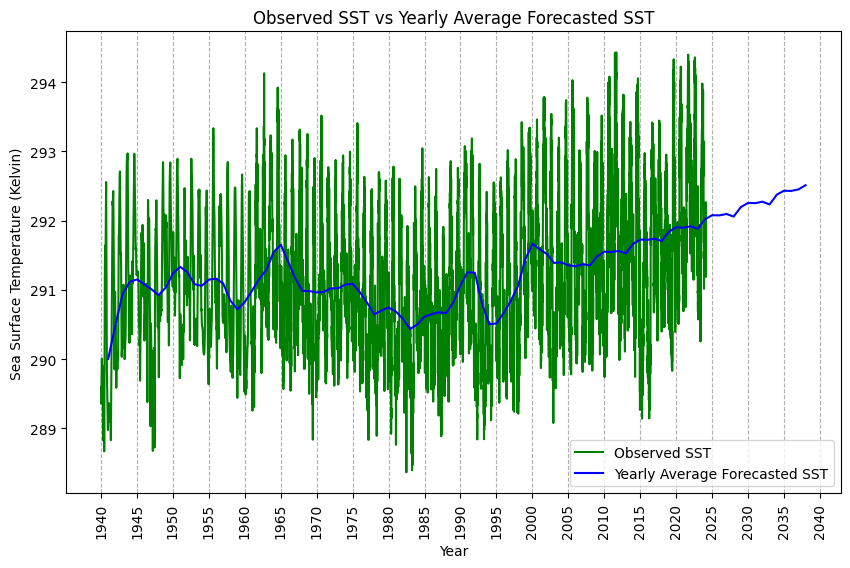

In [33]:
import matplotlib.dates as mdates

# Calculate yearly average of forecasted SST
forecast_yearly = forecast.set_index('ds').resample('Y').mean().reset_index()

# Plot both observed SST and yearly average of forecasted SST
plt.figure(figsize=(10, 6))
plt.plot(frame["ds"], frame["y"], label="Observed SST", color='green')
plt.plot(forecast_yearly["ds"], forecast_yearly["yhat"], label="Yearly Average Forecasted SST", color='blue')
plt.xlabel("Year")
plt.ylabel("Sea Surface Temperature (Kelvin)")
plt.title("Observed SST vs Yearly Average Forecasted SST")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.xticks(rotation=90)
plt.gca().grid(True, which='major', axis='x', linestyle='--')

plt.show()

We can predict that el nino (warmer waters) is already occuring and likely done soon, and the next la nina (cooler waters) will be around 2026-2027.

## Additional Question

We've looked at how tempurature has changed through a multitude of fluctuations and patterns. Let's now forecast what the tempurature will be 80 years into the future to examine the effects of a larger trend: global warming.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbguau063/vbh52pil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbguau063/5ljy5n34.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50571', 'data', 'file=/tmp/tmpbguau063/vbh52pil.json', 'init=/tmp/tmpbguau063/5ljy5n34.json', 'output', 'file=/tmp/tmpbguau063/prophet_modelxs92_yby/prophet_model-20240522042107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:21:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


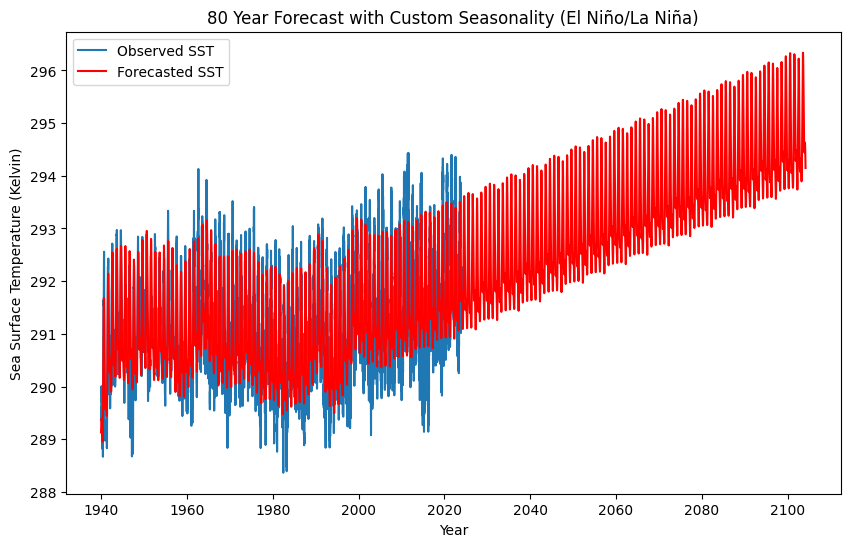

In [34]:
from prophet import Prophet

# Define custom seasonality components for 3-7 year cycles (El Niño/La Niña)
m = Prophet(weekly_seasonality=False, yearly_seasonality=False, seasonality_mode='additive')
m.add_seasonality(name='elnino', period=365*5, fourier_order=10, prior_scale=10)
m.add_seasonality(name='lanina', period=365*5, fourier_order=10, prior_scale=10)

frame = pd.DataFrame({"ds": pd.to_datetime(df['time']), "y": df["sst"]})
m.fit(frame)

future = m.make_future_dataframe(periods=29220)
forecast = m.predict(future)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(frame["ds"], frame["y"], label="Observed SST")
ax.plot(forecast["ds"], forecast["yhat"], label="Forecasted SST", color='red')
ax.set_xlabel("Year")
ax.set_ylabel("Sea Surface Temperature (Kelvin)")
ax.set_title("80 Year Forecast with Seasonality (El Niño/La Niña)")
ax.legend()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbguau063/zbnmk4fg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbguau063/uur_bt1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33708', 'data', 'file=/tmp/tmpbguau063/zbnmk4fg.json', 'init=/tmp/tmpbguau063/uur_bt1u.json', 'output', 'file=/tmp/tmpbguau063/prophet_modelv6rcjoe8/prophet_model-20240522042430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


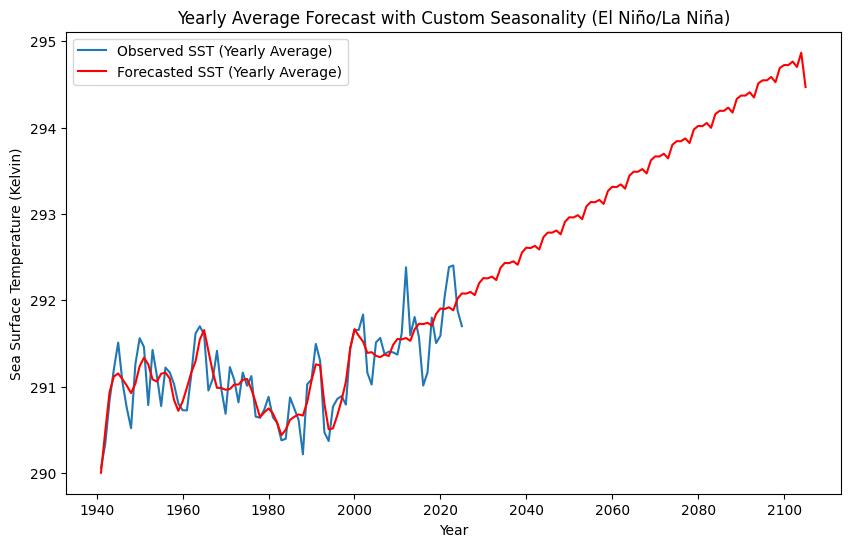

In [35]:
from prophet import Prophet

# Define custom seasonality components for 3-7 year cycles (El Niño/La Niña)
m = Prophet(weekly_seasonality=False, yearly_seasonality=False, seasonality_mode='additive')
m.add_seasonality(name='elnino', period=365*5, fourier_order=10, prior_scale=10)
m.add_seasonality(name='lanina', period=365*5, fourier_order=10, prior_scale=10)

frame = pd.DataFrame({"ds": pd.to_datetime(df['time']), "y": df["sst"]})
m.fit(frame)

future = m.make_future_dataframe(periods=29220)
forecast = m.predict(future)

# Compute yearly averages
observed_yearly_avg = frame.set_index('ds').resample('Y').mean().reset_index()
forecast_yearly_avg = forecast.set_index('ds').resample('Y').mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(observed_yearly_avg["ds"], observed_yearly_avg["y"], label="Observed SST (Yearly Average)")
ax.plot(forecast_yearly_avg["ds"], forecast_yearly_avg["yhat"], label="Forecasted SST (Yearly Average)", color='red')
ax.set_xlabel("Year")
ax.set_ylabel("Sea Surface Temperature (Kelvin)")
ax.set_title("Yearly Average Forecast with Custom Seasonality (El Niño/La Niña)")
ax.legend()
plt.show()

In [42]:
# Convert the forecasted SST from Kelvin to Fahrenheit
forecast["yhat_fahrenheit"] = (forecast["yhat"] - 273.15) * 9/5 + 32

# Calculate the average SST for the specified periods
early_years = forecast[(forecast["ds"] >= "2018-01-01") & (forecast["ds"] <= "2023-12-31")]["yhat_fahrenheit"].mean()
future_years = forecast[(forecast["ds"] >= "2098-01-01") & (forecast["ds"] <= "2103-12-31")]["yhat_fahrenheit"].mean()

print(f"2018 through 2023: the average sea surface temperature was {early_years:.2f} degrees Fahrenheit")
print(f"2098 through 2103: the average sea surface temperature will be {future_years:.2f} degrees Fahrenheit")
print(f"A {(future_years - early_years):.2f} degree increase.")

2018 through 2023: the average sea surface temperature was 65.77 degrees Fahrenheit
2098 through 2103: the average sea surface temperature will be 70.87 degrees Fahrenheit
A 5.11 degree increase.


The surface tempurature is expected to reach 70.87 degrees fahrenheit, up a bit more than 5 degrees from current day.

## Conclusion

My goal was to analyze ENSO trends and predict when the next will occur using sea surface temperature (SST) data from the northern and southern Pacific Ocean.

What we found by plotting the data and running a low pass filter is that these patterns of 2-7 years (average ENSO occurrence) do seem to exist — examining this further with spectral analysis revealed that there are a lot of repetitive cycles occurring in that range as well. More than other periods.

Having identified the trend in the data, I wanted to examine how well it could be predicted by using a standard lag regression — it came out to have a 0.15 mean absolute error. Then I used prophet with a seasonality component of 5 years to predict future values and find ENSO patterns, finding that el nino is already occuring and likely done soon, and the next la nina will be around 2026-2027. For my extra step, I wanted to forecast how sst will change over time with the larger trend of global warming. I found that we can expect a roughly 5 degrees (Fahrenheit) increase in 80 years from today.